In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\\Users\\ADMIN\\Desktop\\PYTHON\\IOT DATA TRAFFIC"

C:\Users\ADMIN\Desktop\PYTHON\IOT DATA TRAFFIC


In [3]:
trafficdata=pd.read_csv('trafficData158324.csv')

In [4]:
trafficdata.shape

(32075, 9)

In [5]:
trafficdata.head()

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,66,56,668,66,2014-02-13T11:30:00,7,190000,158324
1,OK,69,53,668,69,2014-02-13T11:35:00,5,190449,158324
2,OK,69,53,668,69,2014-02-13T11:40:00,6,190898,158324
3,OK,70,52,668,70,2014-02-13T11:45:00,3,191347,158324
4,OK,64,57,668,64,2014-02-13T11:50:00,6,191796,158324


In [6]:
# Univariate Time Series 
traffic=trafficdata[['TIMESTAMP','vehicleCount']]

In [7]:
traffic.head()

,TIMESTAMP,vehicleCount
0,2014-02-13T11:30:00,7
1,2014-02-13T11:35:00,5
2,2014-02-13T11:40:00,6
3,2014-02-13T11:45:00,3
4,2014-02-13T11:50:00,6


In [8]:
traffic.dtypes

TIMESTAMP       object
vehicleCount     int64
dtype: object

In [9]:
# Convert TIMESTAMP into datetime[ns] format
traffic.TIMESTAMP=pd.to_datetime(traffic.TIMESTAMP,errors="coerce")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
# Resample time frequency
hourlytraffic=traffic.resample("60Min",on='TIMESTAMP').sum()

In [11]:
hourlytraffic.head() # Total Vehicles going per hour

,vehicleCount
TIMESTAMP,
2014-02-13 11:00:00,36
2014-02-13 12:00:00,124
2014-02-13 13:00:00,92
2014-02-13 14:00:00,110
2014-02-13 15:00:00,91


In [12]:
dailytraffic=traffic.resample('d',on='TIMESTAMP').sum()

In [13]:
dailytraffic.head()

,vehicleCount
TIMESTAMP,
2014-02-13,625
2014-02-14,1390
2014-02-15,501
2014-02-16,440
2014-02-17,1492


# Indexing of Date inplace of Row Numbers will convert data into Time
# Series

<AxesSubplot:xlabel='TIMESTAMP'>

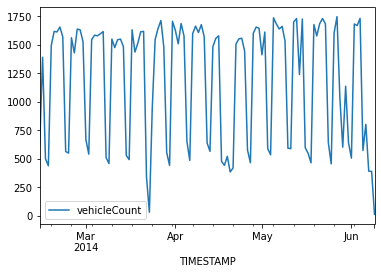

In [14]:
dailytraffic.plot(kind='line')

In [15]:
monthlytraffic=traffic.resample('m',on='TIMESTAMP').sum()

In [16]:
monthlytraffic.head()

,vehicleCount
TIMESTAMP,
2014-02-28,19802
2014-03-31,36947
2014-04-30,35730
2014-05-31,37806
2014-06-30,7764


In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
adfuller(dailytraffic)
# Since p-value=0.8252412405403095 is greater than 0.05, Fail to Reject 
# Null or Accept Null

(-0.7789012626624569,
 0.825241240540309,
 13,
 103,
 {'1%': -3.4954932834550623,
  '5%': -2.8900369024285117,
  '10%': -2.5819706975209726},
 1508.3122250343624)

In [19]:
# To bring data to stationary we must do differencing or discrete difference
dailytrafficdiff=dailytraffic.diff()

<AxesSubplot:xlabel='TIMESTAMP'>

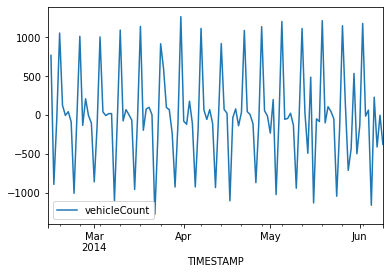

In [20]:
dailytrafficdiff.plot(kind="line")

In [21]:
dailytrafficdiff=dailytrafficdiff.dropna()

In [22]:
adfuller(dailytrafficdiff)
# Since p-value=8.911849241206393e-06 is less than 0.05, Reject Null

(-5.197121179772535,
 8.911849241206393e-06,
 12,
 103,
 {'1%': -3.4954932834550623,
  '5%': -2.8900369024285117,
  '10%': -2.5819706975209726},
 1492.7268606865944)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

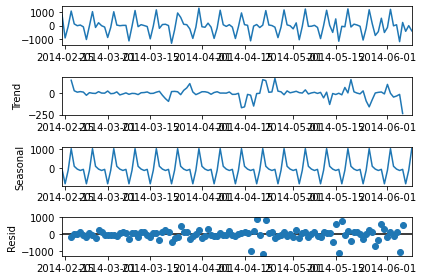

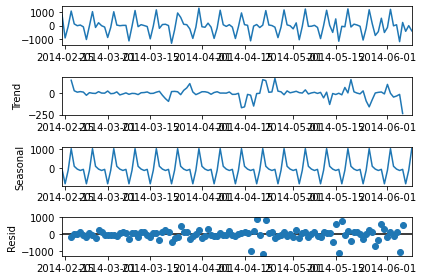

In [24]:
seasonal_decompose(dailytrafficdiff).plot()
# seasonal plot if sesaonality is there pattern repeats at fixed time
# interval

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

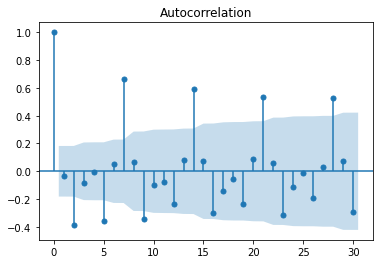

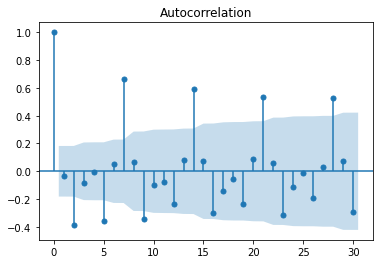

In [26]:
plot_acf(dailytrafficdiff,lags=30) # q=1 ## the 1st point which comes to the blusih area here it is 1 , so q=1

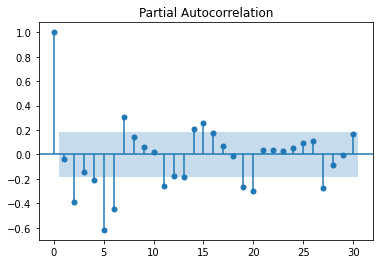

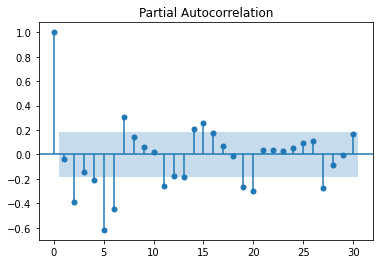

In [27]:
plot_pacf(dailytrafficdiff,lags=30) # p=1

In [28]:
# Auto ARIMA function will try all combinations of p,d,q values from
# 0,0,0 till 5,2,5. And lag order that has the least AIC will be final
# model.

In [29]:
!pip install pmdarima

In [30]:
from pmdarima import auto_arima

In [31]:
trafficarima=auto_arima(dailytrafficdiff,start_p=0,start_q=0,d=1,stationary=True,m=7)
# m=7 i.e indicates daily data

In [32]:
trafficarima.summary()
# Model Built is Seasonal Model
# SARIMAX (5,0,0)[1,0,1][7]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  116
Model:             SARIMAX(5, 0, 0)x(1, 0, [1], 7)   Log Likelihood                -837.300
Date:                             Mon, 07 Feb 2022   AIC                           1692.600
Time:                                     20:32:09   BIC                           1717.382
Sample:                                          0   HQIC                          1702.660
                                             - 116                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.3542      3.261     -0.722      0.470      -8.746       4.038
ar.L1         -0.4533      0.095     -4.797      0.000      -0.639      -0.268
ar.L2         -0.4532      0.109     -4.156      0.000      -0.667      -0.239
ar.L3         -0.3110      0.140     -2.213      0.027      -0.586      -0.036
ar.L4          0.0232      0.110      0.211      0.833      -0.192       0.238
ar.L5         -0.2029      0.127     -1.594      0.111      -0.452       0.047
ar.S.L7        0.9834      0.020     49.954      0.000       0.945       1.022
ma.S.L7       -0.7777      0.112     -6.963      0.000      -0.997      -0.559
sigma2      1.026e+05   1.06e+04      9.727      0.000    8.19e+04    1.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                53.62
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                            -1.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# Ljung Box Test for Residuals 
# Null -H0 - Model does not show lack of fit (or in simple terms—
# the model is just fine). 
# Alt - Ha, is just that the model does show a lack of fit. 

# p-value less than 0.05, Reject Null
# p-value greater than 0.05, Fail to Reject Null (Accept Null)

# Since Prob(Q): 0.69 is greater than 0.05, Fail to Reject Null

# KPSS Test of Statinarity and Ljung Box Test for Model Fit - p-value
# must be greater than 0.05 inorder to Fail to Reject Null Hypothesis

In [34]:
trafficpredict=pd.DataFrame(trafficarima.predict(n_periods=30))

In [35]:
index_of_fc = pd.date_range(dailytrafficdiff.index[-1], 
                            periods = 30, freq='D')


In [36]:
trafficpredict.index=index_of_fc # this is the prediction for next 30 days

<AxesSubplot:>

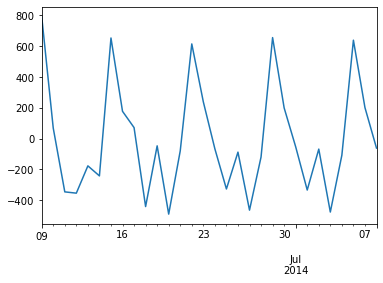

In [37]:
trafficpredict[0].plot(kind="line") # this is the forecast plot for next 30days .

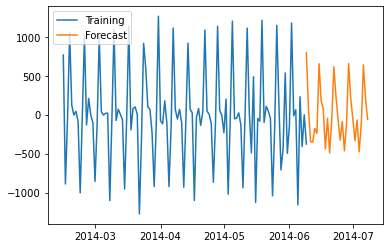

In [38]:
plt.plot(dailytrafficdiff,label="Training")
plt.plot(trafficpredict,label="Forecast")
plt.legend(loc="upper left")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


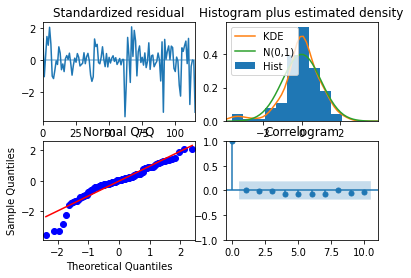

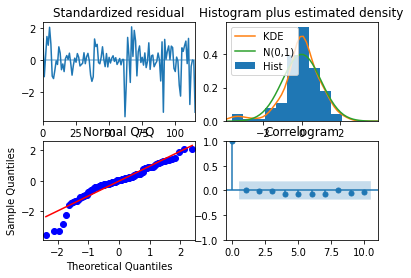

In [39]:
trafficarima.plot_diagnostics()

# Multivariate Analysis

In [40]:
dailytraffic=dailytraffic.reset_index()

In [41]:
dailytraffic.dtypes

TIMESTAMP       datetime64[ns]
vehicleCount             int64
dtype: object

In [42]:
dailytraffic['weekday']=dailytraffic.TIMESTAMP.dt.weekday
# Monday (0)  to Sunday (6)     # from monday it is taking , so monday (0) to sunday (6)

In [43]:
dailytraffic['weeknumber']=dailytraffic.TIMESTAMP.dt.weekofyear

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2156/138360413.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dailytraffic['weeknumber']=dailytraffic.TIMESTAMP.dt.weekofyear


In [44]:
dailytraffic['month']=dailytraffic.TIMESTAMP.dt.month

In [45]:
dailytraffic['monthstart']=dailytraffic.TIMESTAMP.dt.is_month_start

In [46]:
dailytraffic['monthend']=dailytraffic.TIMESTAMP.dt.is_month_end

In [47]:
dailytraffic['quarter']=dailytraffic.TIMESTAMP.dt.quarter

In [48]:
dailytraffic.head()

,TIMESTAMP,vehicleCount,weekday,weeknumber,month,monthstart,monthend,quarter
0,2014-02-13,625,3,7,2,False,False,1
1,2014-02-14,1390,4,7,2,False,False,1
2,2014-02-15,501,5,7,2,False,False,1
3,2014-02-16,440,6,7,2,False,False,1
4,2014-02-17,1492,0,8,2,False,False,1


In [49]:
trafficdata[['avgMeasuredTime','avgSpeed','medianMeasuredTime']].corr()

,avgMeasuredTime,avgSpeed,medianMeasuredTime
avgMeasuredTime,1.000000,-0.845715,1.000000
avgSpeed,-0.845715,1.000000,-0.845715
medianMeasuredTime,1.000000,-0.845715,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

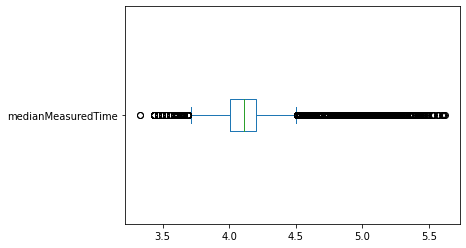

In [50]:
np.log(trafficdata.medianMeasuredTime).plot(kind="box",vert=False)

<AxesSubplot:>

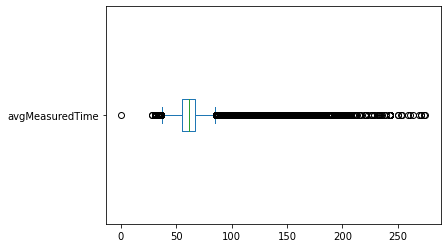

In [51]:
trafficdata.avgMeasuredTime.plot(kind="box",vert=False)

In [52]:
othercols=trafficdata[['TIMESTAMP','medianMeasuredTime','avgSpeed']] 
# here avgMeasuredTime & medianMeasuredTime are 
# very strongly correlated, thats why we choose medianMeasuredTime because median value (it handles the outliers)

In [53]:
othercols.TIMESTAMP=pd.to_datetime(othercols.TIMESTAMP,errors="coerce")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [54]:
dailyavgSpeed=othercols.resample('d',on='TIMESTAMP').mean()

In [55]:
dailymedianMeasuredTime=othercols.resample('d',on='TIMESTAMP').median()

In [56]:
dailyavgSpeed.columns

Index(['medianMeasuredTime', 'avgSpeed'], dtype='object')

In [57]:
dailyavgSpeed=dailyavgSpeed.reset_index()

In [58]:
dailytraffic=pd.concat([dailytraffic,dailyavgSpeed],axis=1)

In [59]:
dailytraffic.columns

Index(['TIMESTAMP', 'vehicleCount', 'weekday', 'weeknumber', 'month',
       'monthstart', 'monthend', 'quarter', 'TIMESTAMP', 'medianMeasuredTime',
       'avgSpeed'],
      dtype='object')

In [60]:
dailytraffic=dailytraffic.drop('TIMESTAMP',axis=1)

In [61]:
dummycols=['weekday', 'weeknumber', 'month', 'monthstart',
       'monthend', 'quarter']

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
for col in dummycols:
    dailytraffic[col]=LabelEncoder().fit_transform(dailytraffic[col])

In [64]:
y=dailytraffic.vehicleCount
X=dailytraffic.drop('vehicleCount',axis=1)

# Model Building

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
reg=LinearRegression().fit(X,y)

In [67]:
reg.score(X,y)

0.7830088813250766

In [68]:
regpredict=reg.predict(X)

In [69]:
regresidual=y-regpredict

In [70]:
np.sqrt(np.mean(regresidual**2)) # RMSE 247.4422

247.44224436950566

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
tree=DecisionTreeRegressor(max_depth=2).fit(X,y)

In [73]:
tree.score(X,y)

0.9009978828320523

In [74]:
treepredict=tree.predict(X)

In [75]:
treeresid=y-treepredict

In [76]:
np.sqrt(np.mean(treeresid**2)) # RMSE 167.1379

167.13796414231425

# Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(reg,X,y,cv=5)

array([0.70558849, 0.73894526, 0.68171175, 0.74290634, 0.68598686])

In [79]:
np.mean([0.70558849, 0.73894526, 0.68171175, 0.74290634, 0.68598686])

0.7110277399999999

In [80]:
cross_val_score(tree,X,y)

array([0.92826011, 0.71328723, 0.76364402, 0.93932502, 0.67386231])

In [81]:
np.mean([0.92826011, 0.71328723, 0.76364402, 0.93932502, 0.67386231])

0.8036757379999999

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
RF=RandomForestRegressor(n_estimators=20).fit(X,y)

In [84]:
RF.score(X,y)

0.9719690722766

In [85]:
cross_val_score(RF,X,y,cv=5)

array([0.8885369 , 0.72726059, 0.77217913, 0.9363195 , 0.78334718])

In [86]:
np.mean([0.90483052, 0.76861274, 0.83218731, 0.94081325, 0.80020674])

0.849330112

In [87]:
RFpredict=RF.predict(X)

In [88]:
RFresid=y-RFpredict

In [89]:
np.sqrt(np.mean(RFresid**2))# RMSE 84.9219

88.93477334685464

# Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

In [91]:
gbm=GradientBoostingRegressor(n_estimators=20).fit(X,y)

In [92]:
gbm.score(X,y)

0.9447150541281616

In [93]:
cross_val_score(gbm,X,y,cv=5)

array([0.94609441, 0.73292929, 0.81230975, 0.93643793, 0.75767039])

In [94]:
np.mean([0.93607804, 0.7349452 , 0.8122595 , 0.93643793, 0.77123925])

0.8381919840000001

In [95]:
gbmpredict=gbm.predict(X)

In [96]:
gbmresid=y-gbmpredict

In [97]:
np.sqrt(np.mean(gbmresid**2))

124.89823786743749